First 5 rows of the dataset:
           Species Name Migration Type  Water Temperature (°C)  \
0         Doomsday Fish       Atypical                      10   
1            Anglerfish        Typical                       5   
2  Southern Right Whale       Atypical                      15   
3   Olive Ridley Turtle       Atypical                      25   
4    Blackspot Seabream       Seasonal                      12   

   Salinity (ppt)        Sighting Location Sighting Date    IUCN Status  
0              35        Offshore Tasmania    2023-02-15     Not Listed  
1              32       Deep Sea, Atlantic    2022-08-20     Not Listed  
2              33  Adventure Bay, Tasmania    2023-06-01     Endangered  
3              30      Unexpected Location    2023-09-10     Vulnerable  
4              34    Seamount, NE Atlantic    2022-04-01  Least Concern  

Summary statistics:
       Water Temperature (°C)  Salinity (ppt)
count               10.000000       10.000000
mean             

c:\Users\MADHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MADHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MADHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MADHU\anaconda3\Lib\site-packages\sklea

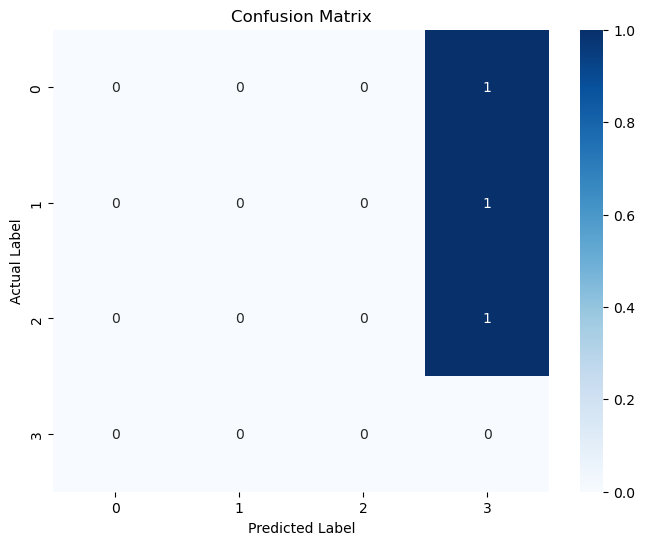

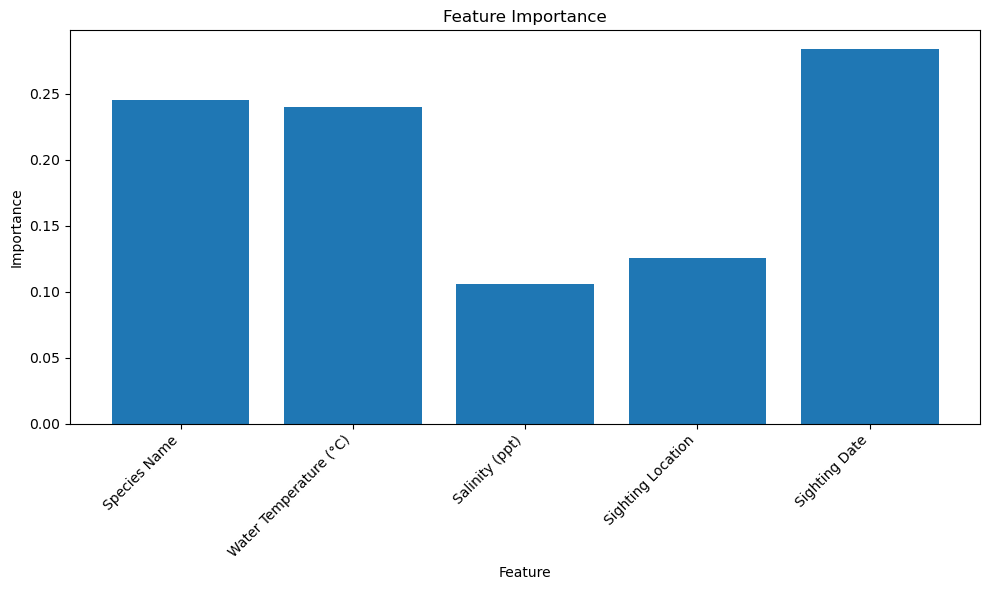

In [1]:
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import LabelEncoder
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 import matplotlib.pyplot as plt
 import seaborn as sns
 

 # Load the dataset
 data = pd.read_csv("deepsea.csv")
 

 # Data Exploration and Preprocessing
 print("First 5 rows of the dataset:")
 print(data.head())
 

 print("\nSummary statistics:")
 print(data.describe())
 

 print("\nData types:")
 print(data.dtypes)
 

 print("\nMissing values:")
 print(data.isnull().sum())
 

 # Encode categorical features
 label_encoder = LabelEncoder()
 data['Species Name'] = label_encoder.fit_transform(data['Species Name'])
 data['Sighting Location'] = label_encoder.fit_transform(data['Sighting Location'])
 data['Sighting Date'] = label_encoder.fit_transform(data['Sighting Date'])
 

 # Select features and target
 X = data[['Species Name', 'Water Temperature (°C)', 'Salinity (ppt)', 'Sighting Location', 'Sighting Date']]
 y = data['Migration Type']
 

 # Split data into training and testing sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 

 # Initialize and train the Random Forest Classifier
 model = RandomForestClassifier(n_estimators=100, random_state=42)
 model.fit(X_train, y_train)
 

 # Make predictions
 y_pred = model.predict(X_test)
 

 # Evaluate the model
 accuracy = accuracy_score(y_test, y_pred)
 print(f"Accuracy: {accuracy:.2f}")
 

 print("\nClassification Report:")
 print(classification_report(y_test, y_pred))
 

 # Confusion Matrix
 cm = confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
 plt.title('Confusion Matrix')
 plt.ylabel('Actual Label')
 plt.xlabel('Predicted Label')
 plt.show()
 

 # Feature Importance
 feature_importances = model.feature_importances_
 features = X.columns
 plt.figure(figsize=(10, 6))
 plt.bar(features, feature_importances)
 plt.xlabel('Feature')
 plt.ylabel('Importance')
 plt.title('Feature Importance')
 plt.xticks(rotation=45, ha='right')
 plt.tight_layout()
 plt.show()
